# Prediction for Credit Card Approval

The primary objective of this project is to predict the approval or rejection of credit card applications.

# Outline
- [ 1 - Import Packages & Implement Functions ](#1)
- [ 2 - Exploratory Data Analysis (EDA)](#2)
  - [ 2.1 - Data Summary and Overview](#2.1)
  - [ 2.2 Descriptive Statistics](#2.2)

- [ 3- Feature Engineering](#3)

- [ 4 - Machine Learning Model Development](#4)
  - [ 4.1 - Decision Tree Classifier](#4.1)
  - [ 4.2 - Random Forest Classifier)](#4.2)
  - [ 4.3 - Gradient Boosting Classifier](#4.3)
  - [ 4.4 - support vector machine](#4.4)
  - [ 4.5 - Logistic Regression](#4.5)


<a name="1"></a>
## 1- Import Packages & Implement Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
def correct_values(data):
    data_c = data.copy()
    data_c["Age"] = data["Age"] / -365.25
    data_c["Employment length"] = data["Employment length"] / -365.25
    data_c["Account age"] = data["Account age"] / -1
    return data_c



def encoder1(data):
    label_encoder = LabelEncoder()
    data['Education level'] = label_encoder.fit_transform(data['Education level'])
    data['Marital status'] = label_encoder.fit_transform(data['Marital status'])
    data['Dwelling'] = label_encoder.fit_transform(data['Dwelling'])
    data['Gender'] = label_encoder.fit_transform(data['Gender'])
    data['Has a car'] = label_encoder.fit_transform(data['Has a car'])
    data['Has a property'] = label_encoder.fit_transform(data['Has a property'])
    data['Employment status'] = label_encoder.fit_transform(data['Employment status'])
    
    return data

def encoder2(data):
    label_encoder = LabelEncoder()
    data['Education level'] = label_encoder.fit_transform(data['Education level'])
    data['Marital status'] = label_encoder.fit_transform(data['Marital status'])
    data['Dwelling'] = label_encoder.fit_transform(data['Dwelling'])
    data['Gender'] = label_encoder.fit_transform(data['Gender'])
    data['Has a car'] = label_encoder.fit_transform(data['Has a car'])
    data['Has a property'] = label_encoder.fit_transform(data['Has a property'])

    data = data.join(pd.get_dummies(data["Employment status"],dtype=int)).drop(['Employment status'],axis=1)

    return data

def corrData(data):
    f = plt.figure(figsize=(25, 19))
    plt.matshow(data.corr(), fignum=f.number)
    plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

def delete_weak_correlations(data,w_c):
    data.drop(w_c,axis=1,inplace=True)
    return data

<a name="2"></a>
## 2- Exploratory Data Analysis (EDA)

In [3]:
df_train = pd.read_csv("Data/train_data.csv")
df_test = pd.read_csv("Data/test_data.csv")

In [4]:
df_train["Is high risk"].value_counts()

Is high risk
0    28666
1      499
Name: count, dtype: int64

In [5]:
df_train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


<a name="2.1"></a>
### 2.1 - Data Summary and Overview

In [6]:
print("df_train Shape: ",df_train.shape)
print("df_test Shape: ",df_test.shape)

df_train Shape:  (29165, 20)
df_test Shape:  (7292, 20)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [8]:
numerical_features = ["Children count","Income","Age","Employment length","Family member count","Account age"]
categorical_features = [feat for feat in df_train.columns if feat not in numerical_features and feat != "ID"]
numerical_features, categorical_features

(['Children count',
  'Income',
  'Age',
  'Employment length',
  'Family member count',
  'Account age'],
 ['Gender',
  'Has a car',
  'Has a property',
  'Employment status',
  'Education level',
  'Marital status',
  'Dwelling',
  'Has a mobile phone',
  'Has a work phone',
  'Has a phone',
  'Has an email',
  'Job title',
  'Is high risk'])

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

<a name="2.2"></a>
### 2.2 Descriptive Statistics


In [10]:
data_train = correct_values(df_train)

In [11]:
data_train.describe().drop(categorical_features,axis=1,errors='ignore').drop(["ID"],axis=1)

,Children count,Income,Age,Employment length,Family member count,Account age
count,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.000000,29165.000000
mean,0.430790,1.868904e+05,43.749425,-162.238908,2.197531,26.137734
std,0.741882,1.014096e+05,11.507180,376.881269,0.912189,16.486702
min,0.000000,2.700000e+04,21.095140,-999.980835,1.000000,-0.000000
25%,0.000000,1.215000e+05,34.154689,1.127995,2.000000,12.000000
50%,0.000000,1.575000e+05,42.614648,4.262834,2.000000,24.000000
75%,1.000000,2.250000e+05,53.234771,8.632444,3.000000,39.000000
max,19.000000,1.575000e+06,68.862423,43.019849,20.000000,60.000000


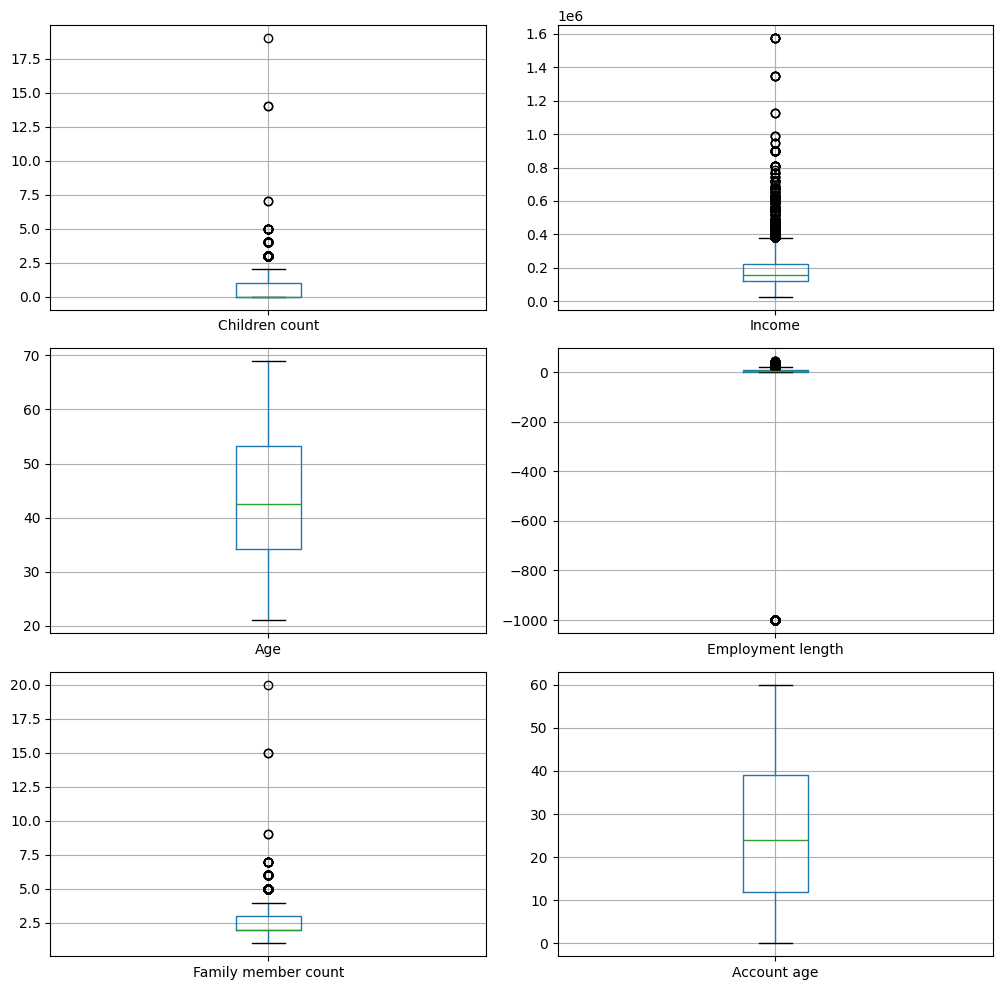

In [12]:
row = int(len(numerical_features) / 2)
fig, axes = plt.subplots(nrows=row, ncols=2, figsize=(10, 10))

axes = axes.flatten()

for i, feat in enumerate(numerical_features):
    data_train.boxplot(feat, ax=axes[i])

plt.tight_layout()
plt.show()

In [13]:
data_train = data_train[(data_train['Children count'] >= 0) & (data_train['Children count'] <= 10)]

In [14]:
q75,q25 = np.percentile(data_train['Income'],[75,25])
intr_qr = q75-q25

Max = q75+(2*intr_qr)
Min = q25
print("Max: ", Max)
print("Min: ", Min)

data_train = data_train[(data_train['Income'] >= Min) & (data_train['Income'] <= Max)]


Max:  432000.0
Min:  121500.0


In [15]:
q75,q25 = np.percentile(data_train['Employment length'],[75,25])
intr_qr = q75-q25

Max = q75+(3*intr_qr)
Min = q25
print("Max: ", Max)
print("Min: ", Min)

data_train = data_train[(data_train['Employment length'] >= Min) & (data_train['Employment length'] <= Max)]
data_train.reset_index(inplace=True)
data_train.drop(['index'],axis = 1,inplace=True)

Max:  30.77618069815195
Min:  1.5468856947296372


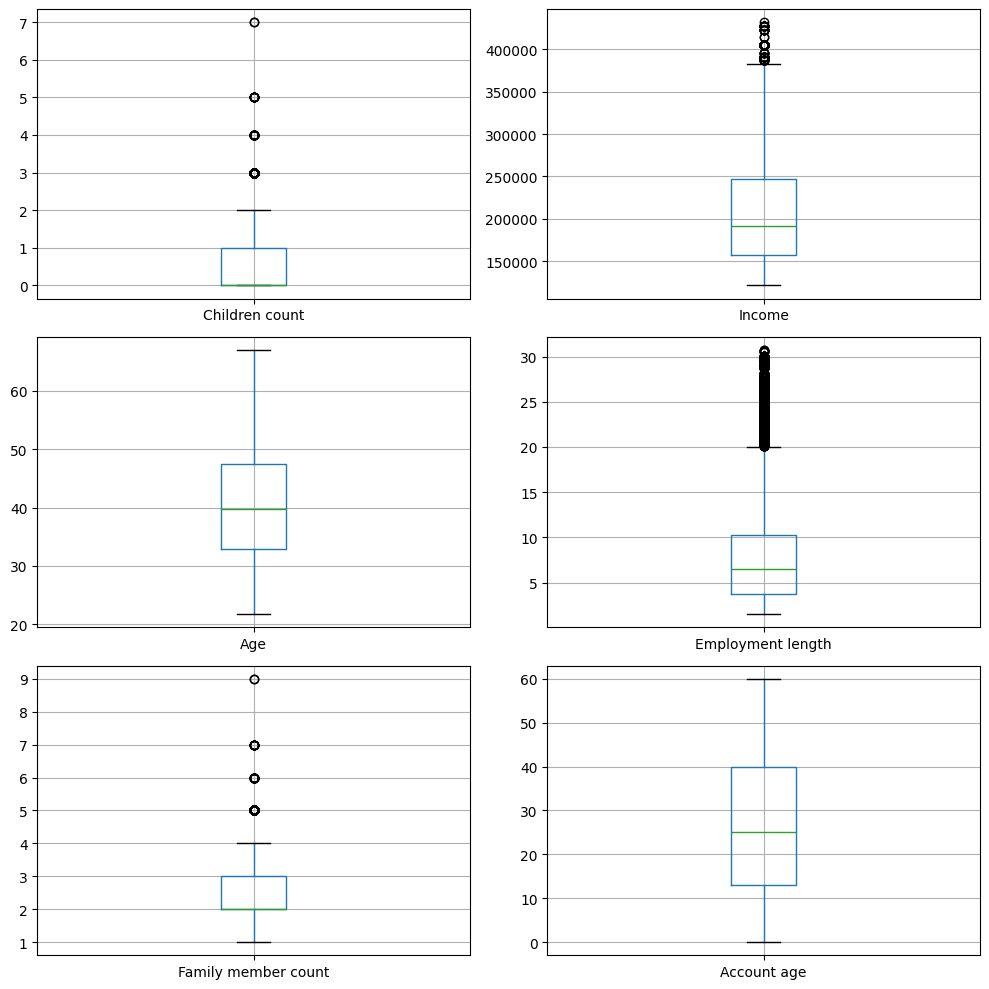

In [16]:
row = int(len(numerical_features) / 2)
fig, axes = plt.subplots(nrows=row, ncols=2, figsize=(10, 10))

axes = axes.flatten()

for i, feat in enumerate(numerical_features):
    data_train.boxplot(feat, ax=axes[i])

plt.tight_layout()
plt.show()

In [17]:
data_train.describe().drop(categorical_features,axis=1,errors='ignore').drop(["ID"],axis=1)

,Children count,Income,Age,Employment length,Family member count,Account age
count,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000
mean,0.505399,207894.221633,40.530277,7.972527,2.286607,26.649239
std,0.766450,68554.330945,9.384853,5.709858,0.929441,16.381619
min,0.000000,121500.000000,21.790554,1.546886,1.000000,-0.000000
25%,0.000000,157500.000000,32.889802,3.764545,2.000000,13.000000
50%,0.000000,191250.000000,39.827515,6.464066,2.000000,25.000000
75%,1.000000,247500.000000,47.482546,10.294319,3.000000,40.000000
max,7.000000,432000.000000,66.937714,30.669405,9.000000,60.000000


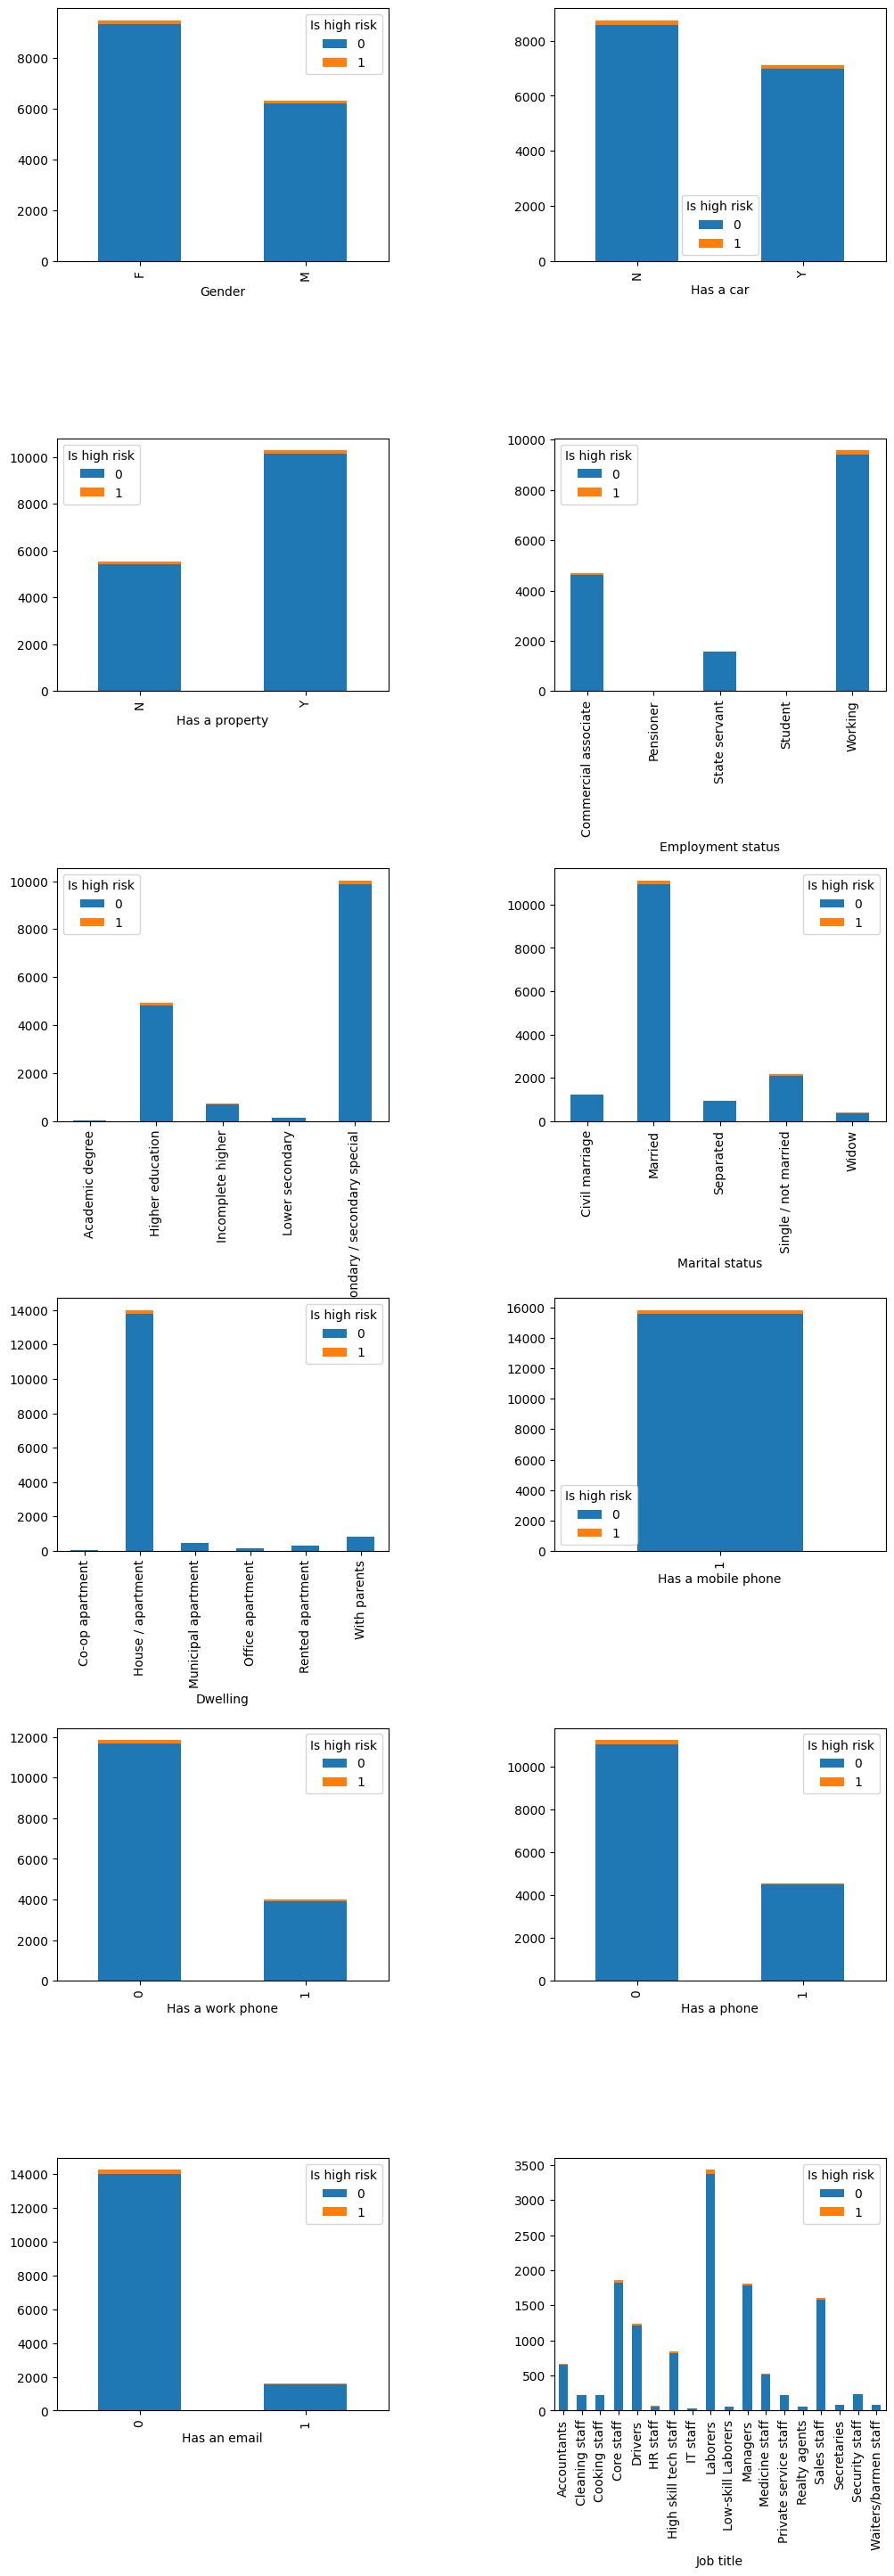

In [18]:
rows = int(len(categorical_features) / 2)
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 35))

axes = axes.flatten()

for i, feat in enumerate(categorical_features):
    if feat != "Is high risk":
        data_train.groupby([feat, "Is high risk"]).size().unstack().plot(kind='bar', stacked=True, ax=axes[i])

plt.subplots_adjust(hspace=0.7, wspace=0.5)
plt.show()


C:\Users\abdel\AppData\Local\Temp\ipykernel_12904\2175130792.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2.0)


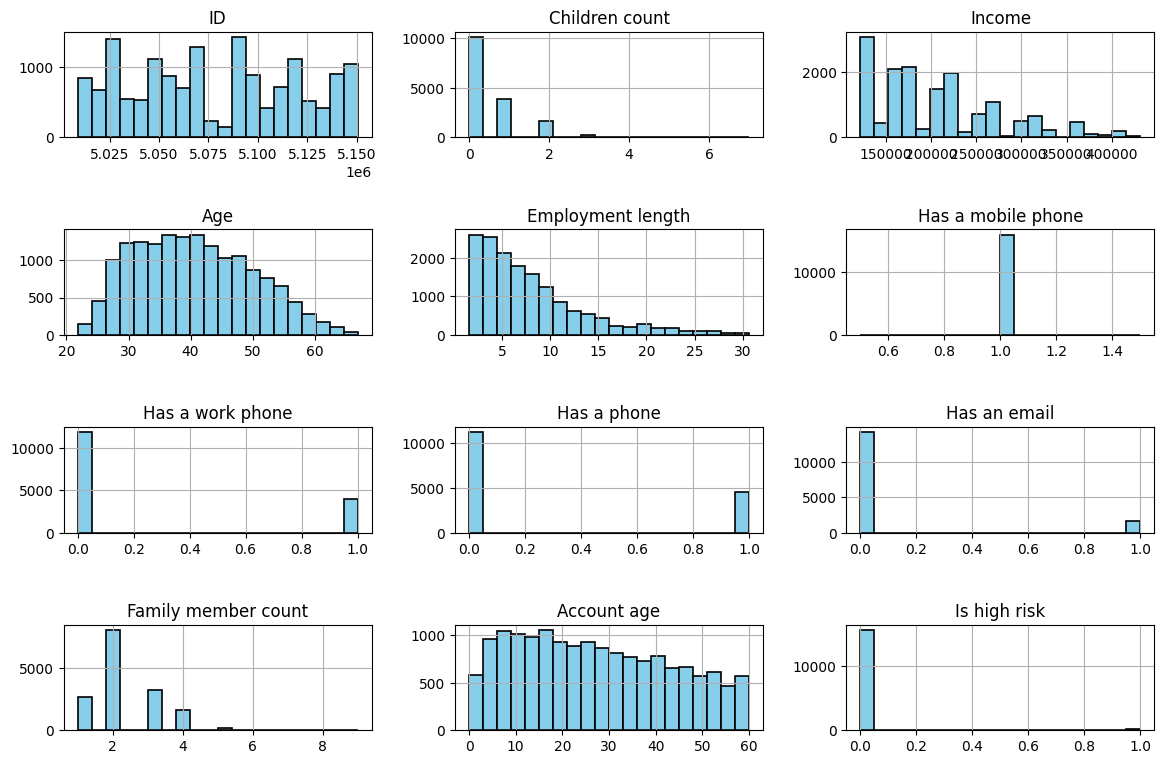

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8), constrained_layout=True)
data_train.hist(ax=axes.flatten(), bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.tight_layout(pad=2.0)
plt.show()

<a name="3"></a>
## 3- Feature Engineering

In [20]:
data_train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,44.547570,8.517454,1,0,0,0,Core staff,2.0,17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,27.734428,4.520192,1,0,0,0,Accountants,2.0,1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,35.101985,15.488022,1,0,0,0,Laborers,4.0,38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,57.300479,5.601643,1,0,0,1,Managers,1.0,11.0,0
4,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,36.279261,10.510609,1,1,0,0,Accountants,2.0,1.0,0


In [21]:
mean_incom = data_train["Income"].mean()
data_train["Rich"] = [x >= mean_incom for x in data_train["Income"]]
data_train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,Rich
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,...,8.517454,1,0,0,0,Core staff,2.0,17.0,0,False
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,4.520192,1,0,0,0,Accountants,2.0,1.0,0,False
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,15.488022,1,0,0,0,Laborers,4.0,38.0,0,False
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,5.601643,1,0,0,1,Managers,1.0,11.0,0,True
4,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,10.510609,1,1,0,0,Accountants,2.0,1.0,0,False


In [22]:
print(data_train["Employment status"].value_counts())
print("--------------------------------------------")
print(data_train["Education level"].value_counts())
print("--------------------------------------------")
print(data_train["Marital status"].value_counts())
print("--------------------------------------------")
print(data_train["Dwelling"].value_counts())
print("--------------------------------------------")
print(data_train["Job title"].value_counts())


Employment status
Working                 9572
Commercial associate    4674
State servant           1578
Pensioner                  8
Student                    5
Name: count, dtype: int64
--------------------------------------------
Education level
Secondary / secondary special    10043
Higher education                  4920
Incomplete higher                  726
Lower secondary                    129
Academic degree                     19
Name: count, dtype: int64
--------------------------------------------
Marital status
Married                 11130
Single / not married     2155
Civil marriage           1242
Separated                 931
Widow                     379
Name: count, dtype: int64
--------------------------------------------
Dwelling
House / apartment      14003
With parents             850
Municipal apartment      482
Rented apartment         302
Office apartment         142
Co-op apartment           58
Name: count, dtype: int64
---------------------------------------

In [23]:
data_train = encoder1(data_train)

In [24]:
data_train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,Rich
0,5037048,1,1,1,0,135000.0,4,4,1,5,...,8.517454,1,0,0,0,Core staff,2.0,17.0,0,False
1,5044630,0,1,0,1,135000.0,0,1,3,1,...,4.520192,1,0,0,0,Accountants,2.0,1.0,0,False
2,5079079,0,0,1,2,180000.0,0,4,1,1,...,15.488022,1,0,0,0,Laborers,4.0,38.0,0,False
3,5112872,0,1,1,0,360000.0,0,1,3,1,...,5.601643,1,0,0,1,Managers,1.0,11.0,0,True
4,5100411,0,1,1,0,135000.0,4,4,1,1,...,10.510609,1,1,0,0,Accountants,2.0,1.0,0,False


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15837 entries, 0 to 15836
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   15837 non-null  int64  
 1   Gender               15837 non-null  int32  
 2   Has a car            15837 non-null  int32  
 3   Has a property       15837 non-null  int32  
 4   Children count       15837 non-null  int64  
 5   Income               15837 non-null  float64
 6   Employment status    15837 non-null  int32  
 7   Education level      15837 non-null  int32  
 8   Marital status       15837 non-null  int32  
 9   Dwelling             15837 non-null  int32  
 10  Age                  15837 non-null  float64
 11  Employment length    15837 non-null  float64
 12  Has a mobile phone   15837 non-null  int64  
 13  Has a work phone     15837 non-null  int64  
 14  Has a phone          15837 non-null  int64  
 15  Has an email         15837 non-null 

In [26]:
X_train = data_train.drop(["Is high risk","ID","Job title"],axis=1)
y_train = data_train["Is high risk"]

scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

data_train = scaled_X_train.join(y_train)
data_train

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Rich,Is high risk
0,1.223103,1.108458,0.734823,-0.659423,-1.063339,0.770363,0.745771,-0.364475,3.683218,0.428075,0.095439,0.0,-0.579465,-0.637071,-0.334653,-0.308375,-0.589047,-0.823194,0
1,-0.817593,1.108458,-1.360872,0.645335,-1.063339,-1.459926,-1.412499,1.883264,-0.316585,-1.363501,-0.604646,0.0,-0.579465,-0.637071,-0.334653,-0.308375,-1.565782,-0.823194,0
2,-0.817593,-0.902154,0.734823,1.950093,-0.406905,-1.459926,0.745771,-0.364475,-0.316585,-0.578428,1.316273,0.0,-0.579465,-0.637071,-0.334653,1.843524,0.692918,-0.823194,0
3,-0.817593,1.108458,0.734823,-0.659423,2.218833,-1.459926,-1.412499,1.883264,-0.316585,1.787000,-0.415240,0.0,-0.579465,-0.637071,2.988169,-1.384325,-0.955323,1.214781,0
4,-0.817593,1.108458,0.734823,-0.659423,-1.063339,0.770363,0.745771,-0.364475,-0.316585,-0.452980,0.444523,0.0,1.725731,-0.637071,-0.334653,-0.308375,-1.565782,-0.823194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15832,-0.817593,1.108458,-1.360872,-0.659423,0.249529,-1.459926,0.745771,-0.364475,-0.316585,0.093157,-0.018684,0.0,-0.579465,1.569685,-0.334653,-0.308375,-1.504736,1.214781,0
15833,1.223103,-0.902154,-1.360872,-0.659423,-1.063339,0.770363,0.745771,0.759394,-0.316585,-0.200041,0.125648,0.0,-0.579465,-0.637071,-0.334653,-1.384325,-1.382644,-0.823194,0
15834,-0.817593,1.108458,-1.360872,0.645335,-1.063339,0.770363,-1.412499,-0.364475,0.683366,-0.665367,-0.206173,0.0,-0.579465,-0.637071,-0.334653,0.767575,-0.833231,-0.823194,0
15835,-0.817593,-0.902154,0.734823,-0.659423,-1.063339,-1.459926,0.745771,-0.364475,-0.316585,-1.084014,-0.702466,0.0,-0.579465,1.569685,-0.334653,-0.308375,-1.443690,-0.823194,0


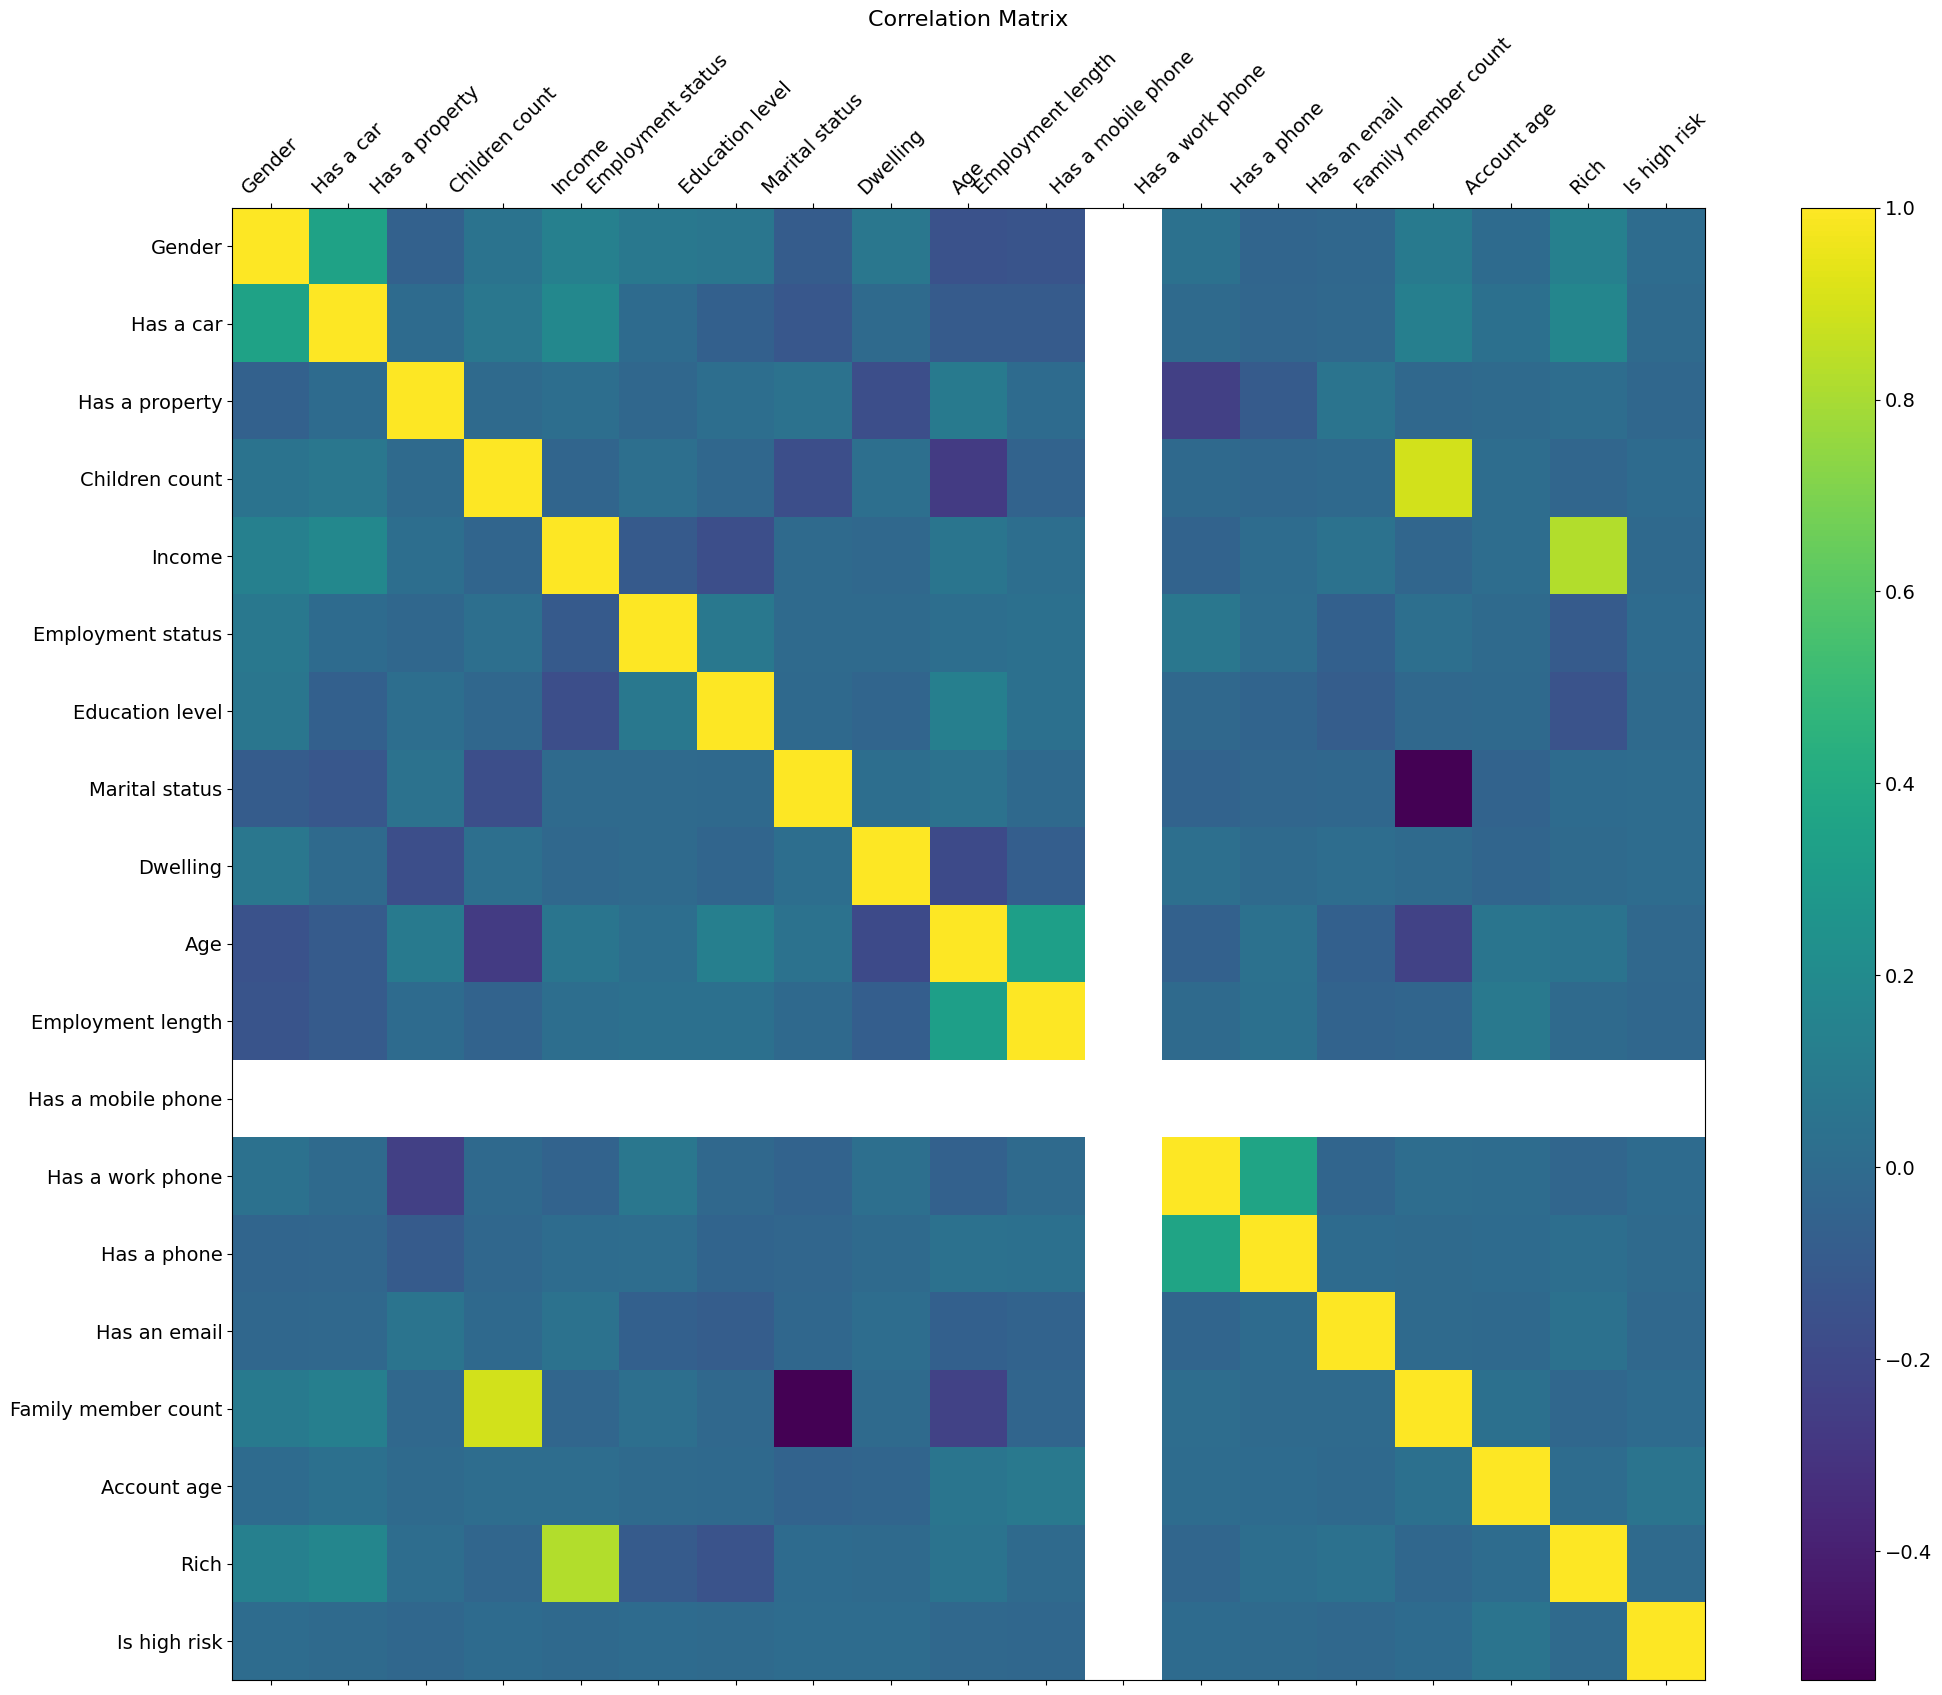

In [27]:
corrData(data_train)

In [28]:
corr = data_train.corr()["Is high risk"]
corr_sort = abs(corr).sort_values(ascending=False)
weak_correlations = [feat for feat ,c in corr_sort.items() if c < 0.004418 or pd.isna(c)]
print(weak_correlations)

['Has a work phone', 'Education level', 'Has a phone', 'Family member count', 'Has a mobile phone']


In [29]:
data_train = delete_weak_correlations(data_train,weak_correlations)
data_train.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Age,Employment length,Has an email,Account age,Rich,Is high risk
0,1.223103,1.108458,0.734823,-0.659423,-1.063339,0.770363,-0.364475,3.683218,0.428075,0.095439,-0.334653,-0.589047,-0.823194,0
1,-0.817593,1.108458,-1.360872,0.645335,-1.063339,-1.459926,1.883264,-0.316585,-1.363501,-0.604646,-0.334653,-1.565782,-0.823194,0
2,-0.817593,-0.902154,0.734823,1.950093,-0.406905,-1.459926,-0.364475,-0.316585,-0.578428,1.316273,-0.334653,0.692918,-0.823194,0
3,-0.817593,1.108458,0.734823,-0.659423,2.218833,-1.459926,1.883264,-0.316585,1.787000,-0.415240,2.988169,-0.955323,1.214781,0
4,-0.817593,1.108458,0.734823,-0.659423,-1.063339,0.770363,-0.364475,-0.316585,-0.452980,0.444523,-0.334653,-1.565782,-0.823194,0


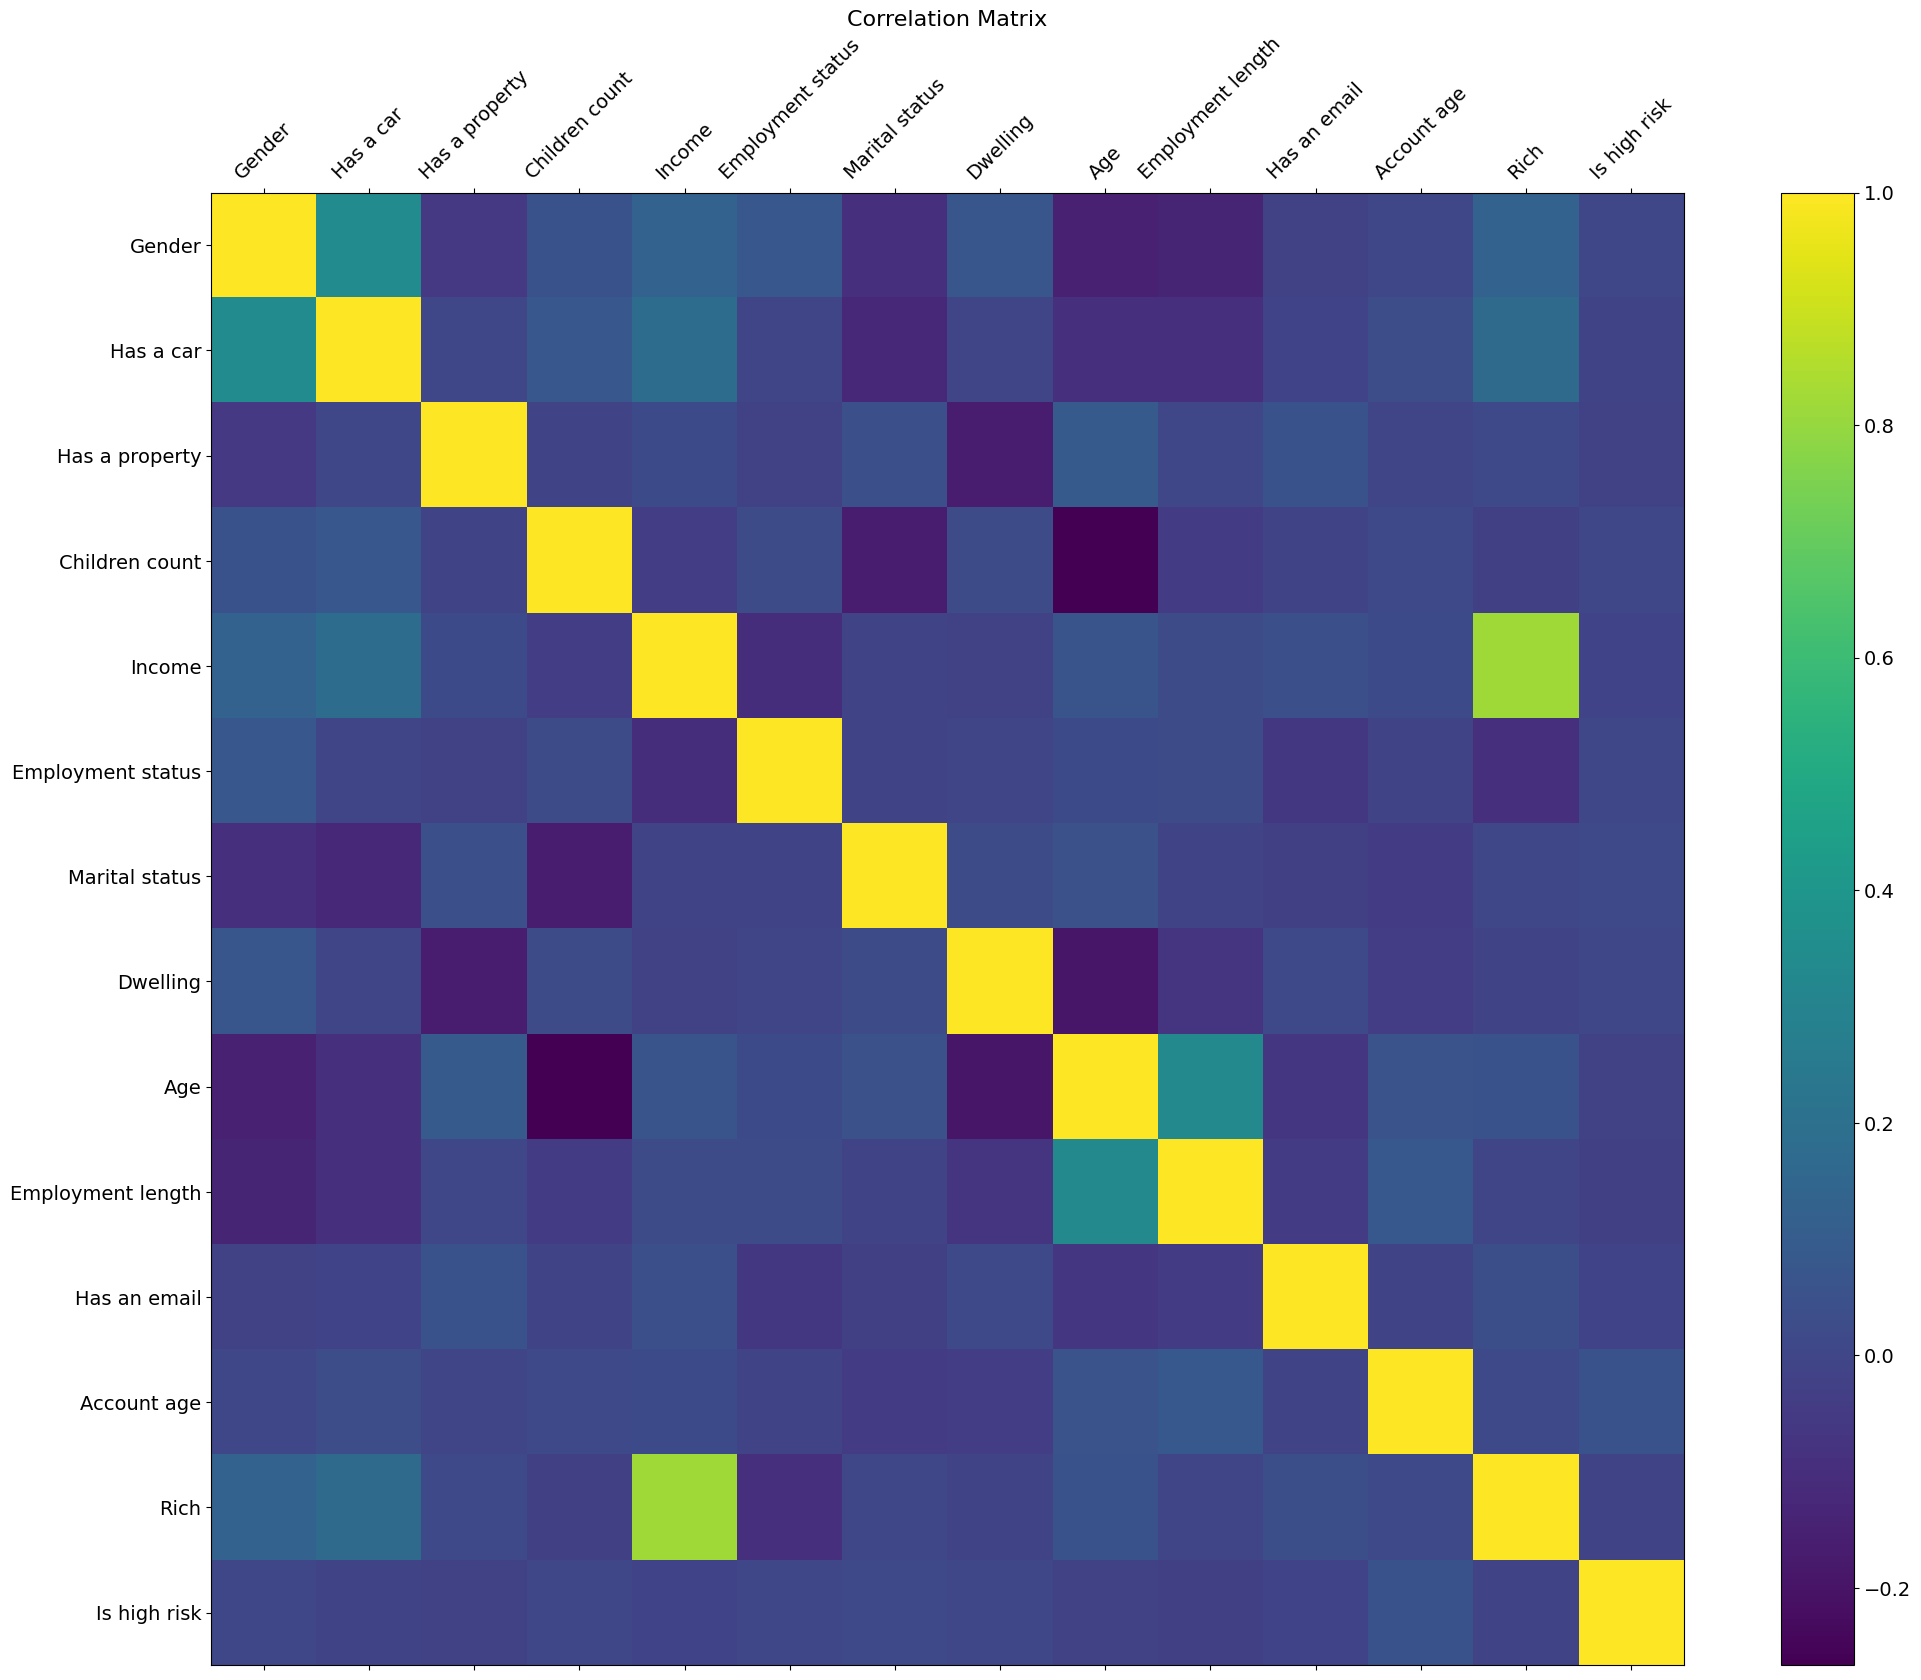

In [30]:
corrData(data_train)

In [31]:
data_test = correct_values(df_test)
data_test = encoder1(data_test)
data_test = delete_weak_correlations(data_test,weak_correlations)

X_train = data_train.drop(["Is high risk"],axis=1)
y_train = data_train["Is high risk"]

X_test = data_test.drop(["Is high risk","ID","Job title"],axis=1)
y_test = data_test["Is high risk"]

mean_incom = X_test["Income"].mean()
X_test["Rich"] = [x >= mean_incom for x in X_test["Income"]]
print(X_train.shape ,X_test.shape)


(15837, 13) (7292, 13)


In [32]:
scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Age,Employment length,Has an email,Account age,Rich
0,-0.702820,-0.790887,0.688062,-0.575595,0.161031,-0.231200,0.675505,-0.30081,0.209044,0.443030,-0.309648,-1.223895,1.295349
1,1.422839,1.264404,-1.453358,-0.575595,4.735559,-1.385935,-0.370975,-0.30081,0.517346,0.437624,-0.309648,-0.620099,1.295349
2,-0.702820,-0.790887,-1.453358,-0.575595,0.465999,-0.231200,-1.417456,-0.30081,1.433898,0.468627,3.229469,1.553565,1.295349
3,-0.702820,1.264404,0.688062,-0.575595,2.513645,-1.385935,-0.370975,-0.30081,-0.830638,0.434050,-0.309648,1.674324,1.295349
4,-0.702820,1.264404,-1.453358,-0.575595,0.378866,0.923534,-0.370975,0.72949,-0.907475,0.435583,-0.309648,1.312047,1.295349


<a name="4"></a>

## 4 - Machine Learning Model Development

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


<a name="4.1"></a>
### 4.1 - Decision Tree Classifier

In [34]:
DTClassifier = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=33)
DTClassifier.fit(X_train, y_train)

DTScore_train = DTClassifier.score(X_train, y_train)
DTScore_test = DTClassifier.score(X_test, y_test)

print(f'DecisionTree Train Score is : {DTScore_train*100 :.2f}%')
print(f'DecisionTree Test Score is : {DTScore_test*100 :.2f}%')

y_pred = DTClassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm))

DecisionTree Train Score is : 98.36%
DecisionTree Test Score is : 98.40%
      0  1
0  7175  0
1   117  0


<a name="4.2"></a>
### 4.2 - Random Forest Classifier

In [46]:
RFClassifier = RandomForestClassifier(criterion = 'entropy',n_estimators=200,max_depth=8,random_state=42)
RFClassifier.fit(X_train, y_train)

RFScore_train = RFClassifier.score(X_train, y_train)
RFScore_test = RFClassifier.score(X_test, y_test)

print(f'RandomForest Train Score is : {RFScore_train*100 :.2f}%')
print(f'RandomForest Test Score is : {RFScore_test*100 :.2f}%')

y_pred = RFClassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm))

RandomForest Train Score is : 98.33%
RandomForest Test Score is : 98.40%
      0  1
0  7175  0
1   117  0


<a name="4.3"></a>
### 4.3 - Gradient Boosting Classifier

In [47]:
GBCModel = GradientBoostingClassifier(n_estimators=1100,max_depth=8,learning_rate=0.4,random_state=42) 
GBCModel.fit(X_train, y_train)

GBCScore_train = GBCModel.score(X_train, y_train)
GBCScore_test = GBCModel.score(X_test, y_test)

print(f'GBC Train Score is : {GBCScore_train*100 :.2f}%')
print(f'GBC Test Score is : {GBCScore_test*100 :.2f}%')

y_pred = GBCModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm))


GBC Train Score is : 98.26%
GBC Test Score is : 95.52%
      0    1
0  6963  212
1   115    2


<a name="4.4"></a>
### 4.4 - support vector machine

In [37]:
SVCModel = SVC(kernel= 'rbf',max_iter=1000,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

SVCScore_train = SVCModel.score(X_train, y_train)
SVCScore_test = SVCModel.score(X_test, y_test)

print(f'SVC Train Score is : {SVCScore_train*100 :.2f}')
print(f'SVC Test Score is : {SVCScore_test*100 :.2f}')

y_pred = SVCModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm))

c:\Python\python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Train Score is : 98.33
SVC Test Score is : 98.40
      0  1
0  7175  0
1   117  0


<a name="4.5"></a>
### 4.5 - Logistic Regression

In [38]:
LRModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LRModel.fit(X_train, y_train)

LRScore_train = LRModel.score(X_train, y_train)
LRScore_test = LRModel.score(X_test, y_test)

print(f'LR Train Score is : {LRScore_train*100 :.2f}')
print(f'LR Test Score is : {LRScore_test*100 :.2f}')

y_pred = LRModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('CM \n', cm)

LR Train Score is : 98.33
LR Test Score is : 98.40
CM 
 [[7175    0]
 [ 117    0]]
